In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [11]:
file = 'dfQ1.csv'
dfQ1 = pd.read_csv(file)

In [12]:
female = dfQ1.groupby('athlete.sex').get_group('F')
male = dfQ1.groupby('athlete.sex').get_group('M')

In [13]:
X = female["distance"]
y = female["average_speed"]


# Note the difference in argument order
modelF = sm.OLS(y, X).fit()
predictionsF = modelF.predict(X) # make the predictions by the model

# Print out the statistics
print(modelF.summary())

                            OLS Regression Results                            
Dep. Variable:          average_speed   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3757.
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:32:09   Log-Likelihood:                -9620.1
No. Observations:                3824   AIC:                         1.924e+04
Df Residuals:                    3823   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0001   1.69e-06     61.298      0.0

In [15]:
X = male["distance"]
y = male["average_speed"]

# Note the difference in argument order
modelM = sm.OLS(y, X).fit()
predictionsM = modelM.predict(X) # make the predictions by the model

# Print out the statistics
print(modelM.summary())

                            OLS Regression Results                            
Dep. Variable:          average_speed   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     76.65
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           2.94e-18
Time:                        17:32:27   Log-Likelihood:                -20036.
No. Observations:                4084   AIC:                         4.007e+04
Df Residuals:                    4083   BIC:                         4.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0001   1.18e-05      8.755      0.0

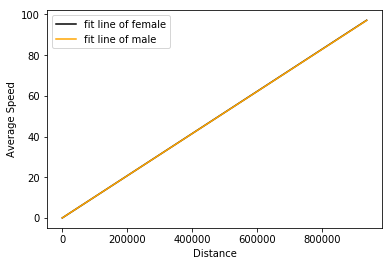

In [16]:
xrange = range(0,938421)
plt.plot(xrange, xrange*modelF.params[0], c="k",label='fit line of female')
plt.plot(xrange,xrange*modelM.params[0],c="orange", label='fit line of male')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Average Speed')
plt.show()

In [7]:
dfSport = dfQ1.groupby('type')

Model of female for Ride
distance    0.000117
dtype: float64
Model of male for Ride
distance    0.000101
dtype: float64


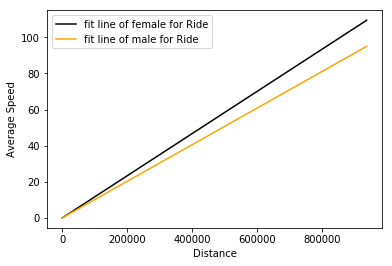

Model of female for Hike
distance    0.000163
dtype: float64
Model of male for Hike
distance    0.000193
dtype: float64


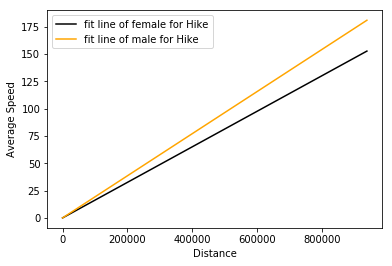

Model of female for Run
distance    0.00006
dtype: float64
Model of male for Run
distance    0.000188
dtype: float64


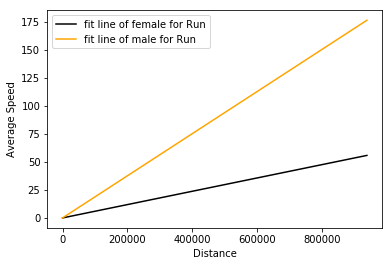

Model of female for Walk
distance    0.00018
dtype: float64
Model of male for Walk
distance    0.000158
dtype: float64


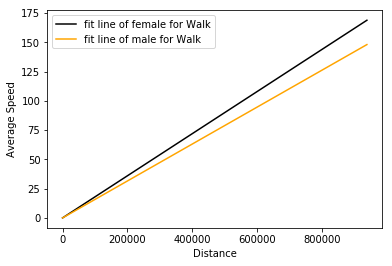

Model of female for Workout
distance    0.000282
dtype: float64
Model of male for Workout
distance    0.000318
dtype: float64


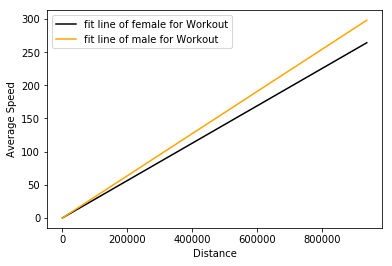

Model of female for Swim
distance    0.000135
dtype: float64
Model of male for Swim
distance    0.000106
dtype: float64


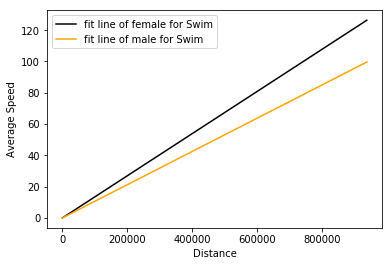

Model of female for BackcountrySki
distance    0.000405
dtype: float64
Model of male for BackcountrySki
distance    0.000204
dtype: float64


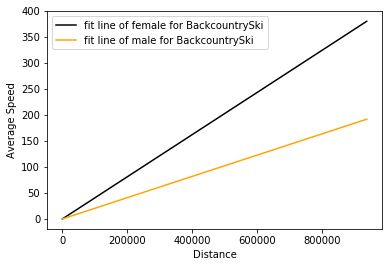

Model of female for Yoga
distance    0.000274
dtype: float64
Model of male for Yoga
distance    0.0
dtype: float64


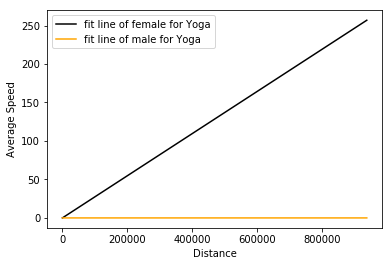

Model of female for NordicSki
distance    0.000159
dtype: float64
Model of male for NordicSki
distance    0.000131
dtype: float64


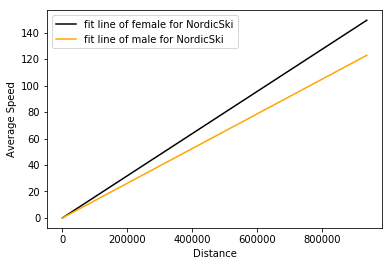

Model of female for VirtualRide
distance    0.000308
dtype: float64
Model of male for VirtualRide
distance    0.000229
dtype: float64


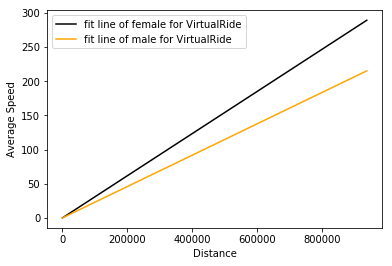

Model of female for WeightTraining
distance    0.000251
dtype: float64
Model of male for WeightTraining
distance    0.0
dtype: float64


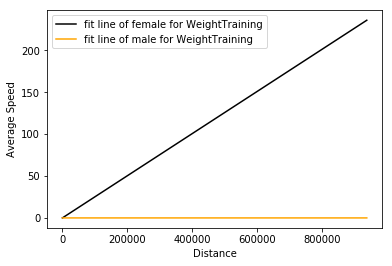

Model of female for Crossfit
distance    0.000182
dtype: float64
Model of male for Crossfit
distance    0.000128
dtype: float64


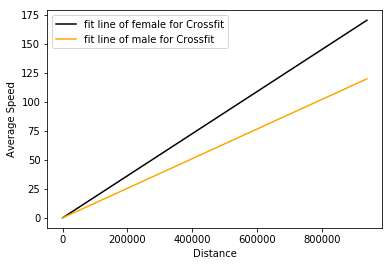

Model of female for AlpineSki
distance    0.000066
dtype: float64
Model of male for AlpineSki
distance    0.000176
dtype: float64


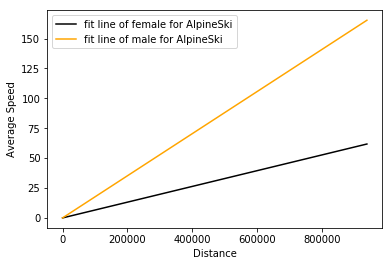

Model of female for Elliptical
distance    0.000238
dtype: float64
Model of male for Elliptical
distance    0.000543
dtype: float64


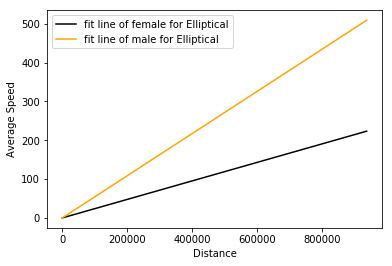

Model of female for Snowboard
distance    0.000353
dtype: float64
Model of male for Snowboard
distance    0.000146
dtype: float64


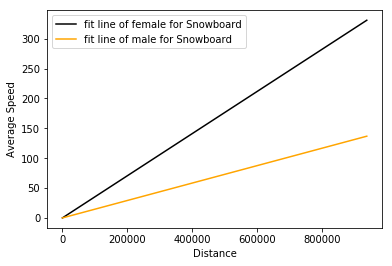

Model of female for Kayaking
distance    0.000254
dtype: float64
Model of male for Kayaking
distance    0.001783
dtype: float64


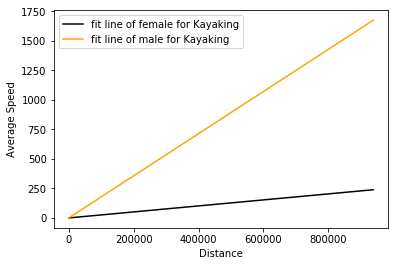

In [8]:
for sport in dfQ1['type'].unique():
    temp = dfSport.get_group(sport)
    temp = temp.groupby('athlete.sex')
    if('F' in temp.groups and 'M' in temp.groups):
        female = temp.get_group('F')
        male = temp.get_group('M')
        X1 = female["distance"]
        y1 = female["average_speed"]
        #X1 = sm.add_constant(X1)
        # Note the difference in argument order
        modelF = sm.OLS(y1, X1).fit()
        predictionsF = modelF.predict(X1) # make the predictions by the model
        # Print out the statistics
        print('Model of female for ' + sport)
        print(modelF.params)
        X = male["distance"]
        y = male["average_speed"]
        #X = sm.add_constant(X)
        # Note the difference in argument order
        modelM = sm.OLS(y, X).fit()
        predictionsM = modelM.predict(X) # make the predictions by the model
        # Print out the statistics
        print('Model of male for ' + sport)
        print(modelM.params)
        plt.plot(xrange, xrange*modelF.params[0], c="k",label='fit line of female for ' + sport)
        plt.plot(xrange,xrange*modelM.params[0],c="orange", label='fit line of male for ' + sport)
        plt.xlabel('Distance')
        plt.ylabel('Average Speed')
        plt.legend()
        plt.show()